<a href="https://colab.research.google.com/github/eds8531/Hello-World/blob/master/House_Prices_Advanced_Regression_Techniques(RFR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('/content/train.csv')

#Is there a better way of uploading all of the data from a large dataset that cutting and pasting all for the column heads from a CSV file?

features = ['MSSubClass', 'MSZoning', 'LotFrontage', "LotArea", 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',	'MasVnrType',	'MasVnrArea',	'ExterQual',	'ExterCond',	'Foundation',	'BsmtQual',	'BsmtCond',	'BsmtExposure',	'BsmtFinType1',	'BsmtFinSF1',	'BsmtFinType2',	'BsmtFinSF2',	'BsmtUnfSF',	'TotalBsmtSF',	'Heating',	'HeatingQC',	'CentralAir',	'Electrical',	'1stFlrSF',	'2ndFlrSF',	'LowQualFinSF',	'GrLivArea',	'BsmtFullBath',	'BsmtHalfBath',	'FullBath',	'HalfBath',	'BedroomAbvGr',	'KitchenAbvGr',	'KitchenQual',	'TotRmsAbvGrd',	'Functional',	'Fireplaces',	'FireplaceQu',	'GarageType',	'GarageYrBlt',	'GarageFinish',	'GarageCars',	'GarageArea',	'GarageQual',	'GarageCond',	'PavedDrive',	'WoodDeckSF',	'OpenPorchSF',	'EnclosedPorch',	'3SsnPorch',	'ScreenPorch',	'PoolArea',	'PoolQC',	'Fence',	'MiscFeature',	'MiscVal',	'MoSold',	'YrSold',	'SaleType',	'SaleCondition']

X = dataset[features]
y = dataset['SalePrice']

In [4]:
X['LotArea']

0        8450
1        9600
2       11250
3        9550
4       14260
        ...  
1455     7917
1456    13175
1457     9042
1458     9717
1459     9937
Name: LotArea, Length: 1460, dtype: int64

Taking care of missing data

In [8]:
from sklearn.impute import SimpleImputer

#This is a consistant and massive stumbling block for me. 
#I get stcuk in the data preprocessing phase because I don't know to tell the different methods which columns, etc... I want them to operate on. 
#I clearly need to get better with pandas, but even when I look up solutions they seem to be for data that is formatted slightly differently than the data I'm trying to access.
#I would really like to level up my skills in this area.

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X['LotFrontage'] = imputer.fit_transform(X.loc[:,'LotFrontage'].values.reshape(-1,1))[:,0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['MSSubClass', 'MSZoning', 'Street', 'Alley', 
                                                                   'LotShape', 'LandContour', 'Utilities', 
                                                                   'LotConfig', 'LandSlope', 'Neighborhood', 
                                                                   'Condition1', 'Condition2', 'BldgType', 
                                                                   'HouseStyle', 'RoofStyle', 'RoofMatl', 
                                                                   'Exterior1st', 'Exterior2nd',	'MasVnrType',	
                                                                   'ExterQual',	'ExterCond',	'Foundation',	
                                                                   'BsmtQual',	'BsmtCond',	'BsmtExposure',	
                                                                   'BsmtFinType1',	'BsmtFinType2',	'Heating', 
                                                                   'HeatingQC',	'CentralAir',	'Electrical',	
                                                                   'KitchenQual',	'Functional',	'FireplaceQu',	
                                                                   'GarageType',	'GarageFinish',	'GarageQual',	
                                                                   'GarageCond',	'PavedDrive',	'PoolQC',	'Fence',	
                                                                   'MiscFeature',	'SaleType',	'SaleCondition'])], 
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

ValueError: ignored

## Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

## Predicting a new result

In [ ]:
regressor.predict([[6.5]])

array([167000.])

## Visualising the Random Forest Regression results (higher resolution)

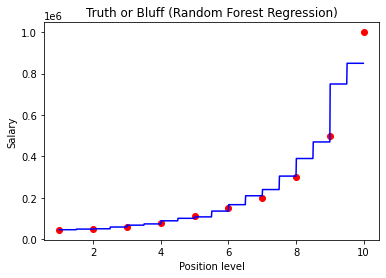

In [ ]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()